# Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-feature.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

# Load the Data

In [3]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       [1., 9., 1., ..., 0., 0., 0.]])

In [5]:
X_test.shape

(1724, 2500)

In [6]:
prob_token_spam

array([1.20201864e-02, 5.16807279e-03, 6.73616326e-03, ...,
       6.07358982e-05, 1.65643359e-05, 6.07358982e-05])

In [7]:
prob_token_spam.shape

(2500,)

In [8]:
(1724,)

(1724,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [9]:
PROB_SPAM = 0.3116

In [10]:
prob_token_spam_log = np.log(prob_token_spam)

In [11]:
prob_token_spam_log

array([ -4.42116784,  -5.26525543,  -5.00026477, ...,  -9.70897563,
       -11.00825861,  -9.70897563])

## Joint prob in log format

In [12]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_token_all))+np.log(PROB_SPAM)

In [13]:
joint_log_spam

array([  22.40232074,    1.9749388 ,   17.82328579, ..., -365.46693914,
        -10.0840659 , -112.33755953])

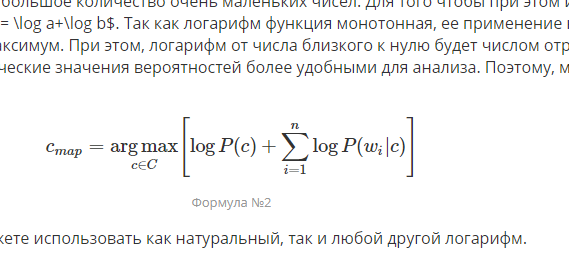

In [14]:
my_joint_log_spam = np.log(PROB_SPAM) + X_test.dot(np.log(prob_token_spam))

In [15]:
my_joint_log_spam

array([-1217.58228001,  -263.20632211,  -376.49673407, ...,
       -4751.19998133,  -200.97825875, -1821.09399646])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1- P(Spam))}{P(X)}$$

In [16]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)-np.log(prob_token_all))+np.log(1-PROB_SPAM)

In [17]:
joint_log_ham

array([-5.89765740e+01, -1.08628206e+01, -3.47633960e+01, ...,
        5.98728099e+01,  5.53170387e-02,  2.51424338e+01])

# Makin Prediction

### Checking for higher joint prob

$$P(Spam \, | \, X) \, > \, P(ham \, | \, x)$$
<br>
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, > \, P(ham \, | \, x)$$

In [18]:
prediction = joint_log_spam > joint_log_ham


In [19]:
prediction[-10:]

array([False, False, False, False, False,  True, False, False, False,
       False])

In [20]:
y_test[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Simplify

In [21]:
joint_log_spam = X_test.dot(np.log(prob_token_spam))+np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham))+np.log(1-PROB_SPAM)

# Metrics and Evaluation

In [22]:
correct_doc = (y_test==prediction).sum()

In [23]:
correct_doc

1685

In [24]:
wrong_doc=-correct_doc+y_test.shape[0]

In [25]:
# Accuracy
print('Accuracy of the model is {:.2%}'.format(correct_doc/len(y_test)))
print('Fraction classified incorrectly {:.2%}'.format(1-correct_doc/len(y_test)))

Accuracy of the model is 97.74%
Fraction classified incorrectly 2.26%


# Visualising the Results

In [26]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

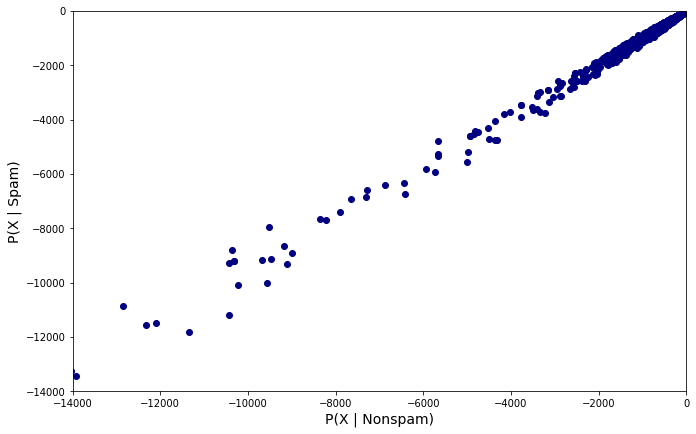

In [27]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The decision line

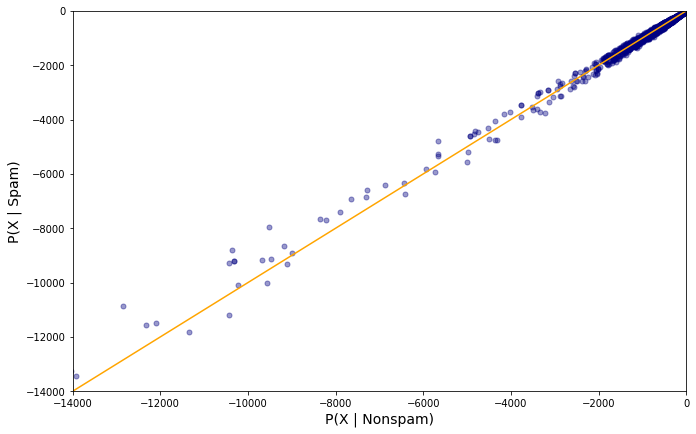

In [28]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.4, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

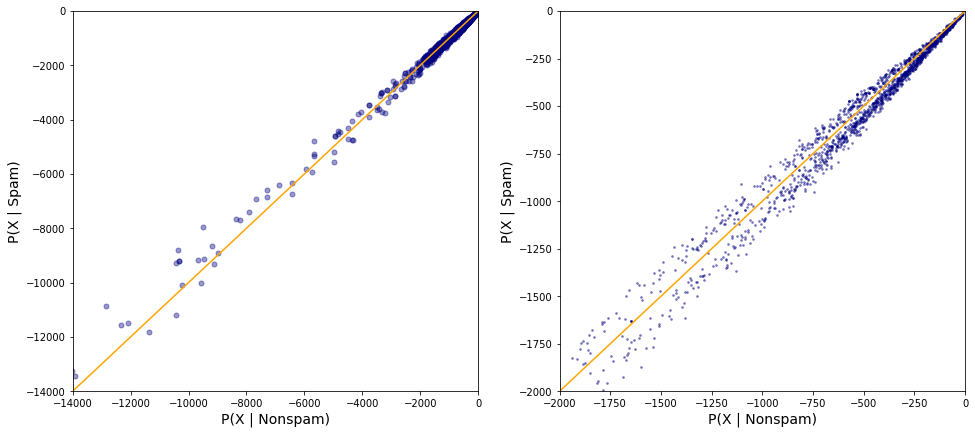

In [29]:
plt.figure(figsize=(16, 7))

# Chart 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set Scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.4, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

#Set Scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.4, s=3)
plt.plot(linedata, linedata, color='orange')



plt.show()

In [30]:
# Chart styling

sns.set_style('whitegrid')
labels = 'Actual Category'


summary_df=pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                        labels: y_test})
summary_df

,P(X | Spam),P(X | Nonspam),Actual Category
0,-1217.582280,-1298.961175,1.0
1,-263.206322,-276.044081,1.0
2,-376.496734,-429.083416,1.0
3,-1475.294242,-1550.653825,1.0
4,-1232.380776,-1305.081897,1.0
...,...,...,...
1719,-1947.527927,-2063.535511,0.0
1720,-877.107236,-787.100758,0.0
1721,-4751.199981,-4325.860232,0.0
1722,-200.978259,-190.838876,0.0


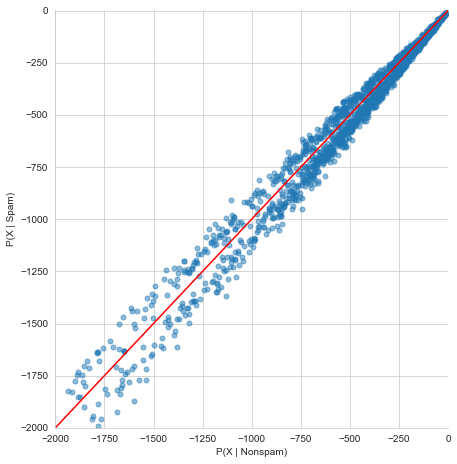

In [31]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, 
          scatter_kws={'alpha':0.5, 's':25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='red')


plt.show()

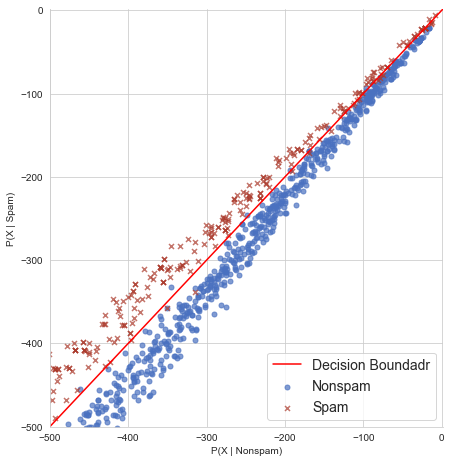

In [32]:
my_color= ['#4a71c0', '#AB3A2C']
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, 
          scatter_kws={'alpha':0.7, 's':25}, hue=labels, markers=['o', 'x'], palette=my_color, legend=False)
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='red')

plt.legend(('Decision Boundadr', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)


plt.show()

## False Pozitives and False Negatives

In [33]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [35]:
true_pos = (y_test == 1) & (prediction == 1)

In [40]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [41]:
true_pos.sum()

568

In [42]:
false_pos = (y_test == 0) & (prediction == 1)

In [43]:
false_pos

array([False, False, False, ..., False, False, False])

In [44]:
false_pos.sum()

18

In [45]:
false_neg = (y_test == 1) & (prediction == 0)

In [46]:
false_neg

array([False, False, False, ..., False, False, False])

In [47]:
false_neg.sum()

21

## Recal score

In [48]:
recall_score = true_pos.sum() / (true_pos.sum()+false_neg.sum())

In [49]:
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.43%


## Precision Score

In [52]:
precision_score = true_pos.sum() / (true_pos.sum()+false_pos.sum())
print('Preciosion score is {:.3}'.format(precision_score))

Preciosion score is 0.969


## F-score or F1 Score

In [54]:
f1_score = 2 * (precision_score*recall_score)/(precision_score+recall_score)
print('F score is {:.2}'.format(f1_score))

F score is 0.97
